# Part 14

# Box and violin plots

In [29]:
# Import all the usual stuff
import numpy as np
from numpy.random import randn
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
data1 = randn(100)
data2 = randn(100) + 2

<AxesSubplot:>

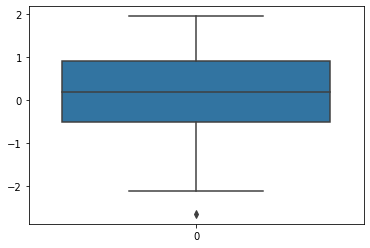

In [31]:
sns.boxplot(data = data1)

### How to interpret a boxplot?

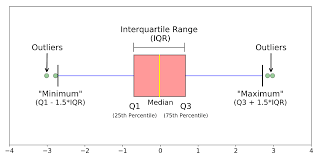

In [32]:
from IPython.display import Image
Image(filename='iqr.png',height = 640, width = 480)

(array([ 1.,  2.,  4., 11., 13., 14., 20., 17., 13.,  5.]),
 array([-2.64658032, -2.18686148, -1.72714264, -1.26742379, -0.80770495,
        -0.3479861 ,  0.11173274,  0.57145158,  1.03117043,  1.49088927,
         1.95060812]),
 <BarContainer object of 10 artists>)

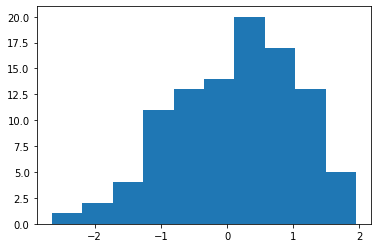

In [33]:
plt.hist(data1)

<AxesSubplot:>

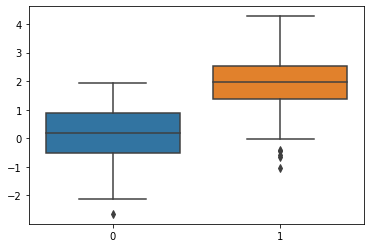

In [34]:
sns.boxplot(data = [data1,data2]) # note the 'data = '; the older version of seaborn does not need this

<AxesSubplot:>

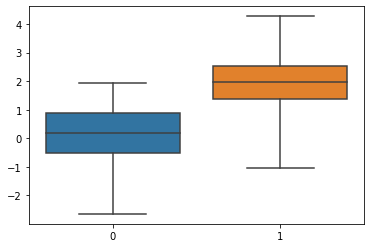

In [35]:
sns.boxplot(data = [data1,data2],whis = np.inf) # set the whisker to 'infinity', effectively including all outliers

**Let us do another example, this time with some real data**

In [36]:
dframe_wine = pd.read_csv("data/redwines.csv")

In [37]:
dframe_wine.groupby('quality').count()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_so2,total_so2,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


Let us compare the alcohol content of wines which have quality == 5, those which have quality == 6, and those with quality == 7 using boxplots (grouped boxplot)

In [38]:
x1 = dframe_wine.alcohol[dframe_wine.quality == 5]
x2 = dframe_wine.alcohol[dframe_wine.quality == 6]
x3 = dframe_wine.alcohol[dframe_wine.quality == 7]

<AxesSubplot:>

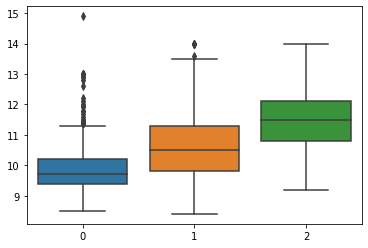

In [39]:
sns.boxplot(data = [x1,x2,x3])

This would be more informative if we added notches to the boxes. While we're at it, let's make the plot a bit bigger

<AxesSubplot:>

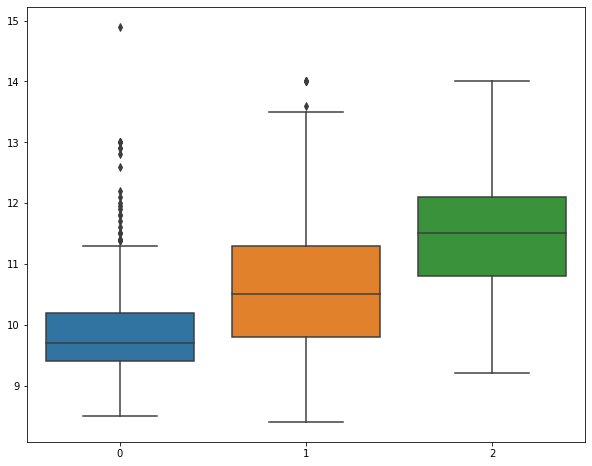

In [40]:
f, axes = plt.subplots(figsize = (10,8))
sns.boxplot(data = [x1,x2,x3])

Another example - this time with the familiar *iris* data set

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

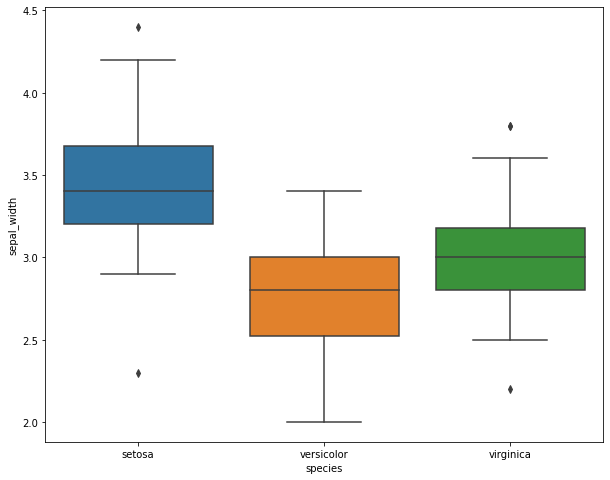

In [41]:
df = sns.load_dataset('iris')
f, axes = plt.subplots(figsize = (10,8))
sns.boxplot( x=df["species"], y=df["sepal_width"])

Let's go back to the *redwines* data, and plot the alcohol content for all qualities of wine

In [42]:
dframe_wine.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_so2', 'total_so2', 'density', 'pH', 'sulphates',
       'alcohol', 'quality'],
      dtype='object')

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

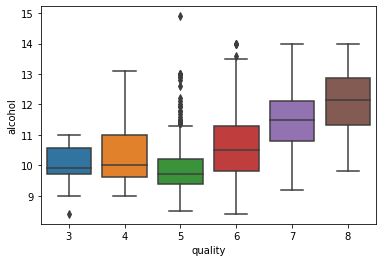

In [43]:
sns.boxplot( x=dframe_wine["quality"], y=dframe_wine["alcohol"])

When we have a lot of categories on the x-axis, we might want to make the boxes narrower:

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

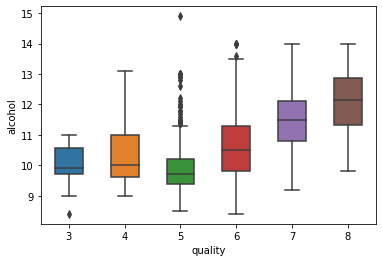

In [44]:
sns.boxplot( x=dframe_wine["quality"], y=dframe_wine["alcohol"], width = 0.5)

### Violin plots

Let's create an example where a box plot doesn't give the whole picture

In [45]:
from scipy import stats

# A normal Distribution
data1 = stats.norm(0,5).rvs(100)

# Two gamma distributions concatenated, with the second one inverted
data2 = np.concatenate([stats.gamma(5).rvs(50)-1,
                        -1*stats.gamma(5).rvs(50)])

First let's look at boxplots of the two distributions

<AxesSubplot:>

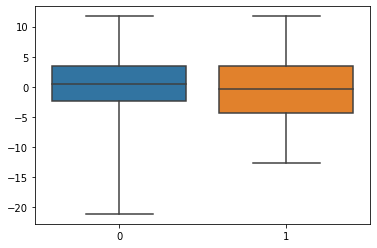

In [46]:
sns.boxplot(data=[data1,data2],whis=np.inf)

Based on the boxplot, both distributions look similar, though they differ quite a bit if we look at their KDE plots:

<AxesSubplot:ylabel='Density'>

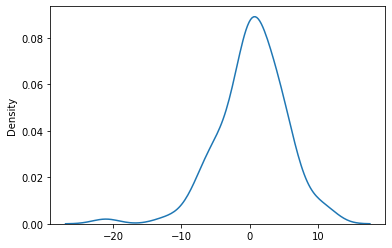

In [47]:
sns.kdeplot(data1)

<AxesSubplot:ylabel='Density'>

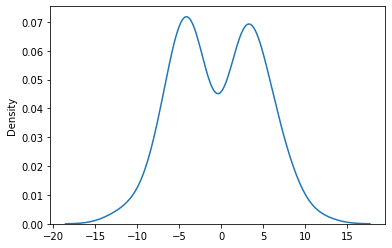

In [48]:
sns.kdeplot(data2)

Violin plot overcomes this limitation of the boxplot

<AxesSubplot:>

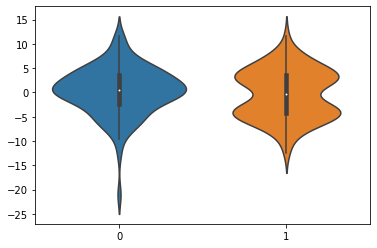

In [49]:
sns.violinplot(data = [data1,data2])

<AxesSubplot:>

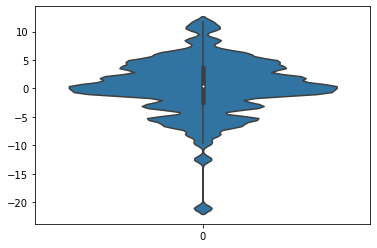

In [50]:
sns.violinplot(data = data1,bw=0.1) # manually setting bandwidth - in this case very small, so a very sensitive KDE plot

<AxesSubplot:>

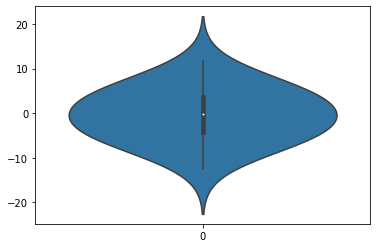

In [51]:
sns.violinplot(data = data2,bw=1) # this time with a large bandwidth

<AxesSubplot:>

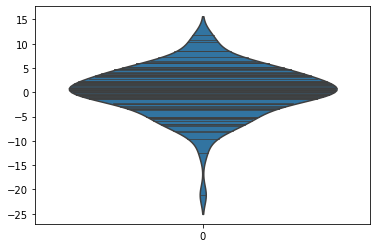

In [52]:
sns.violinplot(data = data1,inner = 'stick') # show individual data points as 'sticks'

Again, let's do one with the *iris* data. In this exmple, we'll choose a palette, so that the colours used come from this collection of colours

In [53]:
df = sns.load_dataset('iris')

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

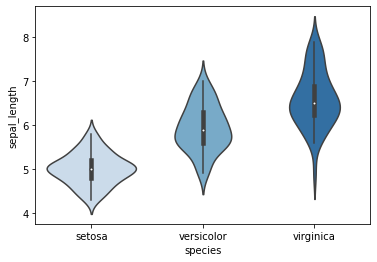

In [54]:
sns.violinplot( x = df["species"], y = df["sepal_length"], palette = "Blues")

Of course, we can control what colour we want each group to be. We can specify our own palette as a dictionary:

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

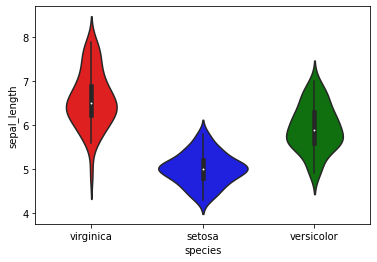

In [55]:
my_palette = {"versicolor": "green", "setosa": "blue", "virginica":"red"}
sns.violinplot(x = df["species"], y = df["sepal_length"], palette = my_palette,
               order=["virginica","setosa","versicolor"])

# End of part 11